In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape


(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

We do not need CustomerID

In [8]:
df.drop(['CustomerID'],axis=1,inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df.Age.min()

18

In [28]:
x1 = df.loc[:,['Age','Spending Score (1-100)']].values
x2 = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values


Get k-means and find optimal k

C:\Users\kabir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


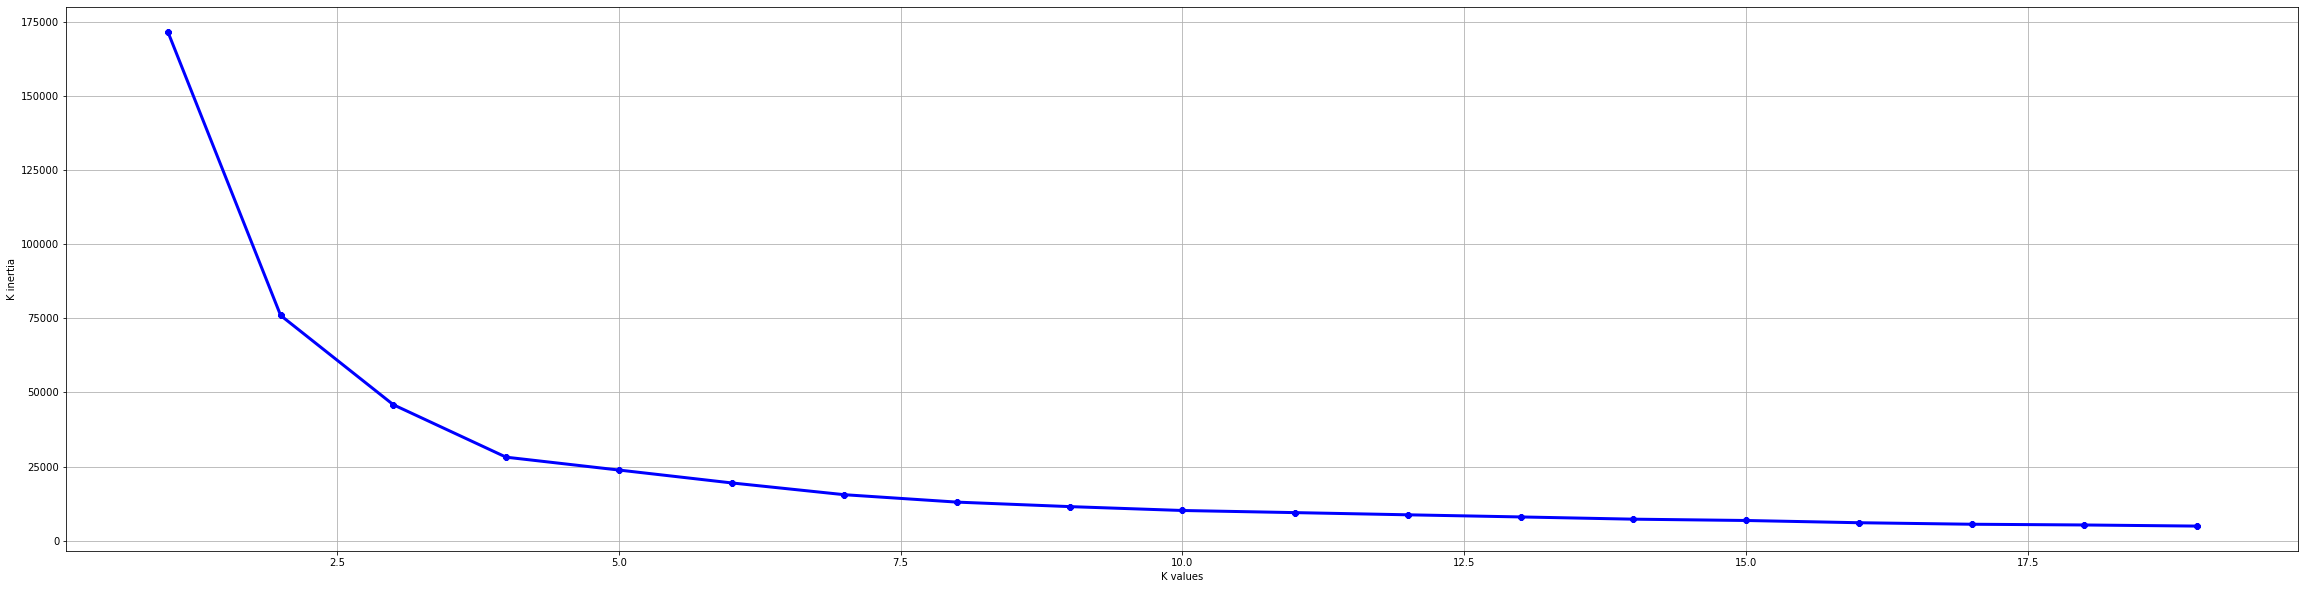

In [29]:
from sklearn.cluster import KMeans
ages = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x1)
    ages.append(kmeans.inertia_)
plt.figure(figsize=(40,10))
plt.grid()
plt.plot(range(1,20),ages,linewidth=3,color = "blue",marker="8")
plt.xlabel('K values')
plt.ylabel('K inertia')
plt.show()

It takes off at 3. so we take value of k as 4

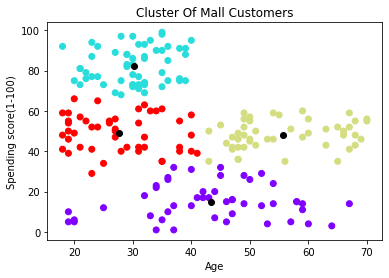

In [30]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0],x1[:,1],c= kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster Of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Spending score(1-100)')
plt.show()

C:\Users\kabir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


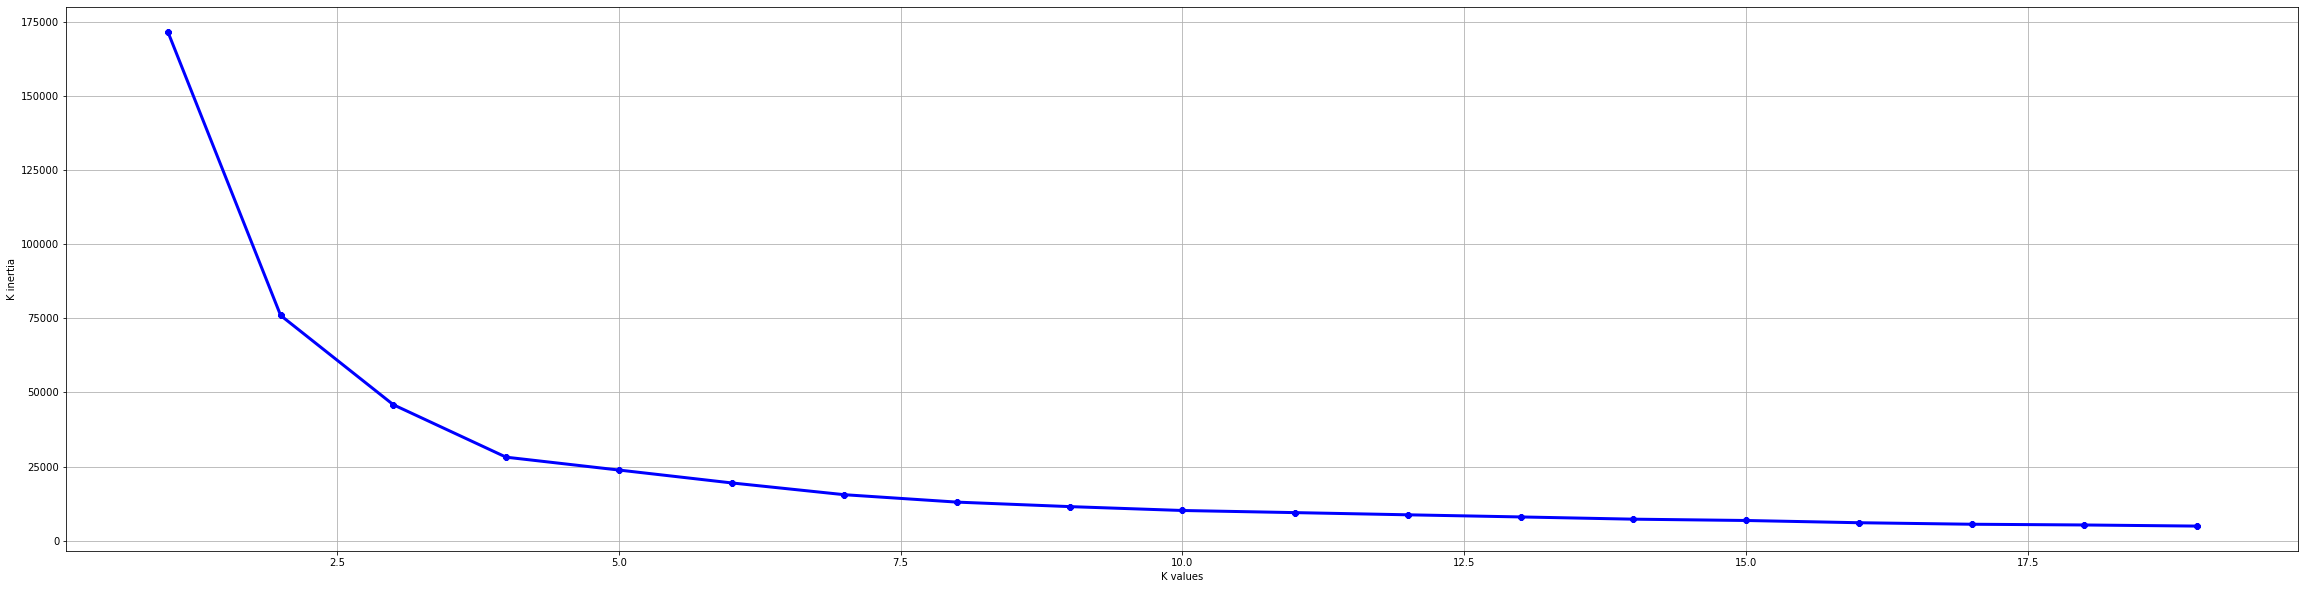

In [31]:
incomes =[]
for k in range(1,20):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x2)
    incomes.append(kmeans.inertia_)
plt.figure(figsize=(40,10))
plt.grid()
plt.plot(range(1,20),ages,linewidth=3,color = "blue",marker="8")
plt.xlabel('K values')
plt.ylabel('K inertia')
plt.show()

Again k is 5



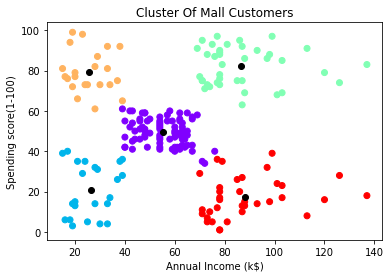

In [33]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x2)
plt.scatter(x2[:,0],x2[:,1],c= kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster Of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score(1-100)')
plt.show()